<a href="https://colab.research.google.com/github/Aminfaraji/ABINetpaddleocr/blob/main/ABINetpaddleocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m pip install paddlepaddle-gpu==2.4.1.post112 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!git clone https://github.com/PaddlePaddle/PaddleOCR.git
%cd /content/PaddleOCR
!pip install -r requirements.txt

In [ ]:
%cd /content/PaddleOCR
!mkdir pretrained_model
%cd pretrained_model/
!wget https://paddleocr.bj.bcebos.com/rec_r45_abinet_train.tar
!tar -xf rec_r45_abinet_train.tar && rm -rf rec_r45_abinet_train.tar

In [56]:
!rm -rf /content/PaddleOCR/train_data

In [60]:
# !mkdir /content/PaddleOCR/train_data
# !unzip /content/drive/MyDrive/IDPL-PFOD2-dataset/train.zip -d /content/PaddleOCR/train_data
# !unzip /content/drive/MyDrive/IDPL-PFOD2-dataset/val.zip -d /content/PaddleOCR/train_data
!cp /content/drive/MyDrive/IDPL-PFOD2-dataset/val.txt -r /content/PaddleOCR/train_data
!cp /content/drive/MyDrive/IDPL-PFOD2-dataset/train.txt -r /content/PaddleOCR/train_data


In [3]:
import cv2
import os
#from imutils import perspective
import numpy as np
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from imutils import perspective

In [80]:
!python3 tools/train.py -c /content/PaddleOCR/pretrained_model/rec_r45_abinet_train/config.yml -o Global.pretrained_model=/content/PaddleOCR/pretrained_model/rec_r45_abinet_train/best_accuracy

/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr

In [63]:
%cd /content/PaddleOCR

/content/PaddleOCR


In [40]:
with open(r'/content/PaddleOCR/train_data/dataset_IDPL/test.txt',encoding='utf-8') as f:
  w=open('/content/PaddleOCR/train_data/dataset_IDPL/test_new.txt','w',encoding='utf-8')
  ff=f.readlines()
  for i in ff:
      index=i.find(',')
      q=i[0:index]+' '+i[index+1:]
      w.writelines(q)

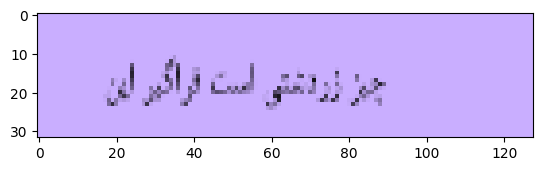

In [71]:
import matplotlib.pyplot as plt
img=cv2.imread('/content/PaddleOCR/train_data/train/IDback_15773.png')
plt.imshow(img)
img_resi=cv2.resize(img,(128,32))
plt.imshow(img_resi)

In [77]:
256//8

32